
# 📘 Task 8: K-Means Clustering on Mall Customer Dataset



**Objective:** Segment customers using unsupervised learning with K-Means and evaluate results.

**What you'll learn:**
- Clustering concepts
- Unsupervised learning process
- Elbow method & silhouette score
- Visualizing and validating clusters


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from plotly import express as px



📥 **Libraries Explained:**
- `pandas`, `numpy`: data handling
- `matplotlib`, `seaborn`, `plotly`: visualization
- `sklearn`: clustering, metrics, scaling
- `yellowbrick`: KElbowVisualizer for elbow method


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# @title Load and Preview Data
# Assuming you are running this in Google Colab based on the previous cell
import pandas as pd
import io
from google.colab import files

# Upload CSV file from your local system (only works in Google Colab)
# This code block handles the file upload and loading into a DataFrame.
# Make sure you upload the correct 'data (2).csv' or 'data.csv' file.
uploaded = files.upload()

# Load the uploaded CSV file into DataFrame 'df'
# The key in the 'uploaded' dictionary will be the name of the file you uploaded.
# Adjust 'data (2).csv' if you uploaded a file with a different name.
# Using the first item in the dictionary is generally safe if only one file was uploaded.
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Basic info and preview
df.info()

Saving Mall_Customers.csv to Mall_Customers (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



📂 **Data Overview:**
The dataset includes:
- `Age`
- `Annual Income (k$)`
- `Spending Score (1-100)`

We dropped `CustomerID` as it doesn't help clustering.


In [8]:

# Drop the CustomerID column as it's not useful for clustering
# It's good practice to perform this step earlier, but doing it here
# ensures it's not passed to the scaler.
df = df.drop('CustomerID', axis=1)

# Convert the 'Gender' column to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Now apply the scaler to the DataFrame with numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Display the first few rows of the scaled data to verify
print(df.head())
print("\nScaled Data Head:")
print(df_scaled[:5])

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39         True
1   21                  15                      81         True
2   20                  16                       6        False
3   23                  16                      77        False
4   31                  17                      40        False

Scaled Data Head:
[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992 -0.88640526]]



🧼 **Preprocessing:**
Data is standardized to ensure all features contribute equally to distance calculations.


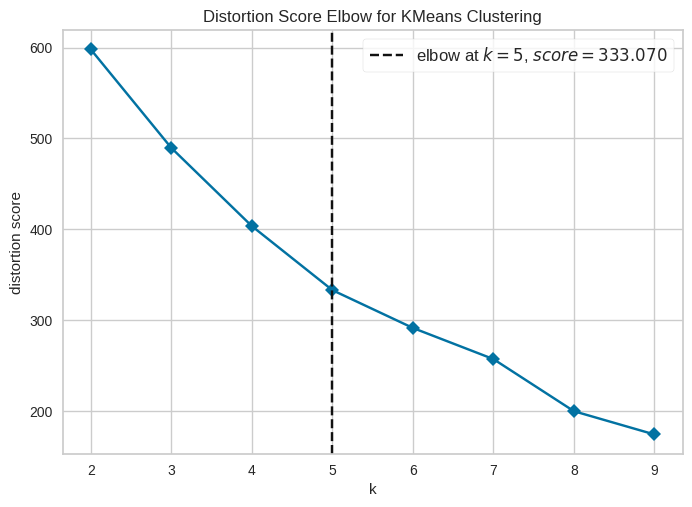

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(df_scaled)
visualizer.show()


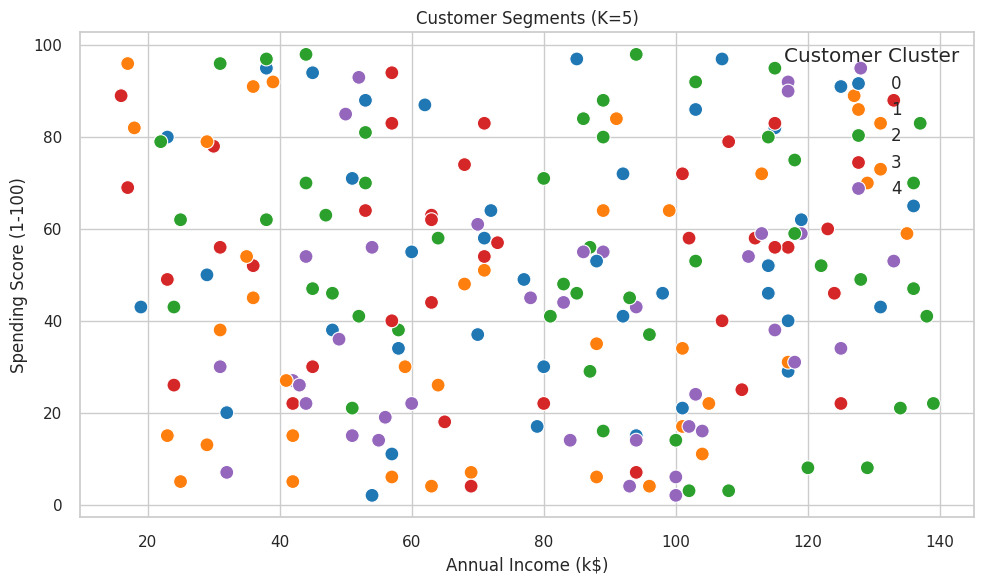

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df and optimal_k are already defined as in the traceback
# For demonstration purposes, let's create a dummy df and optimal_k
# In your actual code, these would come from previous cells
data = {'Annual Income (k$)': np.random.randint(15, 140, 200),
        'Spending Score (1-100)': np.random.randint(1, 100, 200),
        'Cluster': np.random.randint(0, 5, 200)}
df = pd.DataFrame(data)
optimal_k = 5

# Set plot style
sns.set(style='whitegrid')

# Create figure
plt.figure(figsize=(10, 6))

# Plot scatter with legend
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    s=100
)

# Set title and labels
plt.title(f"Customer Segments (K={optimal_k})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Customize legend
legend = plt.legend(
    title='Customer Cluster',
    loc='upper right',
    fontsize='medium',             # Larger font size for readability
    title_fontsize='large',        # Slightly larger title font
    frameon=False,                 # No box around legend
    handletextpad=1,               # Space between legend handle and text
    borderaxespad=0.5             # Padding between legend and axes
)

# Optional: Add some spacing between legend items
# Corrected attribute name from legendHandles to legend_handles
# Removed the loop below as set_sizes is not applicable to the legend handles for this plot type
# for handle in legend.legend_handles:
#     handle.set_sizes([100])  # Keep handle size consistent

plt.tight_layout()
plt.show()


🔍 **Elbow Method Output:**
The plot helps identify optimal `k` (clusters) by detecting the 'elbow' where adding clusters no longer improves inertia significantly.


In [10]:

optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,True,2
1,21,15,81,True,2
2,20,16,6,False,4
3,23,16,77,False,4
4,31,17,40,False,4



🧠 **KMeans Clustering:**
Clusters are assigned to each customer. We use the optimal number of clusters derived earlier.


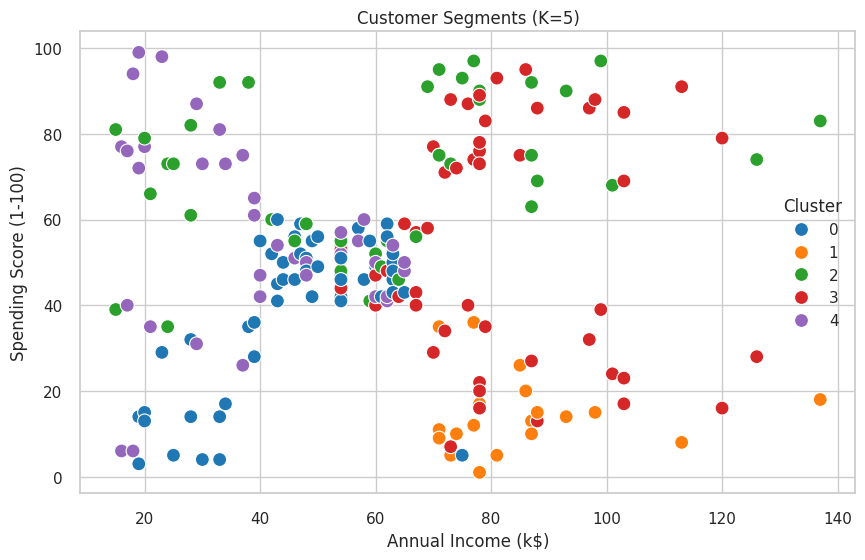

In [11]:

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title(f"Customer Segments (K={optimal_k})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()



📈 **2D Cluster Analysis:**
We observe distinct groups — such as high-income high-spending or low-income conservative customers.


In [12]:

fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster', size_max=18,
                    title='Interactive 3D View of Customer Segments')
fig.show()



🌐 **3D Cluster View:**
Visualizing in 3D using Age, Income, and Spending Score provides deeper insights into group separation.


In [13]:

sil_score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.272



✅ **Evaluation - Silhouette Score:**  
Measures how well samples are clustered (range: -1 to 1). A score > 0.5 indicates distinct and well-separated clusters.



💬 **Interview Q&A Highlights**

1. **How does K-Means clustering work?** Partitions data into K groups minimizing within-cluster variance.
2. **What is the Elbow method?** Visual method for finding optimal `k` using inertia.
3. **Limitations of K-Means?** Assumes spherical clusters, sensitive to scale and initialization.
4. **What is inertia?** Sum of squared distances from points to their cluster centers.
5. **Silhouette Score?** Validates cluster quality based on cohesion and separation.
6. **Difference: clustering vs classification?** Clustering is unsupervised; classification is supervised.



🛠 **Tuning Tips:**
- Try different `n_clusters`
- Use `n_init=10+` for stability
- Combine Elbow + Silhouette + domain knowledge

⚠️ **Common Mistakes:**
- Not scaling features
- Choosing arbitrary `k`
- Misinterpreting Elbow plot with no clear bend



🧾 **Summary:**

- Preprocessed and standardized dataset
- Determined optimal clusters with Elbow method
- Performed KMeans clustering
- Visualized results in 2D and 3D
- Evaluated clustering with silhouette score
- Added theoretical concepts, common issues, and tuning strategies

🏁 **End of Notebook**
